In [1]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('creditcard.csv')

# EDA

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

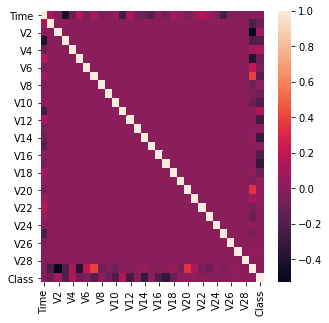

In [7]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(df.corr())

In [8]:
corr_mat1 = df.corr()
for x in range(df.shape[1]):
    corr_mat1.iloc[x,x] = 0.0
corr_mat1.abs().idxmax()

Time          V3
V1        Amount
V2        Amount
V3          Time
V4         Class
V5        Amount
V6        Amount
V7        Amount
V8        Amount
V9         Class
V10        Class
V11         Time
V12        Class
V13         Time
V14        Class
V15         Time
V16        Class
V17        Class
V18        Class
V19       Amount
V20       Amount
V21       Amount
V22         Time
V23       Amount
V24         Time
V25         Time
V26         Time
V27       Amount
V28       Amount
Amount        V2
Class        V17
dtype: object

Features that are highly correlated with each other.

# Preprocessing

In [4]:
X=df.drop(['Class'],axis=1)

In [5]:
Class = df['Class'].values.reshape(-1,1)

In [6]:
#Normalize
scl = StandardScaler()
X_norm = scl.fit_transform(X)

In [7]:
norm_data = np.concatenate((X_norm, Class), axis=1)
norm_data = pd.DataFrame(norm_data, columns = df.columns)

In [8]:
norm_data.shape

(284807, 31)

In [9]:
#segregating fraud data
data = df.loc[df["Class"] == 0]
fraud_data = df.loc[df["Class"] == 1]

In [10]:
#segregating normalized fraud data
data1 = norm_data.loc[norm_data["Class"] == 0]
fraud_data1 = norm_data.loc[norm_data["Class"] == 1]

In [11]:
X_data = data1.drop(['Class'],axis=1)
X_fraud_data = fraud_data1.drop(['Class'],axis=1)

In [12]:
print("Normal data ", data.shape)
print("Fraud data ", fraud_data.shape)

Normal data  (284315, 31)
Fraud data  (492, 31)


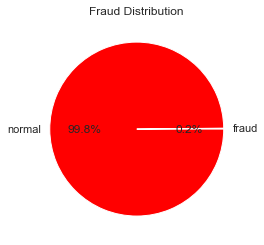

In [66]:
fig, ax = plt.subplots()
ax.pie([len(fraud_data),len(data)], labels = ['fraud','normal'], colors = ['blue','red'], autopct='%1.1f%%')
ax.set_title('Fraud Distribution')
plt.show()

We can see that the dataset is highly imbalanced with 99.8% normal data and 0.2% of fradulent data. Using supervised approaches on highly imbalanced data wont yield good results, though we may get good accuracy , f1 score will be low.

<AxesSubplot:>

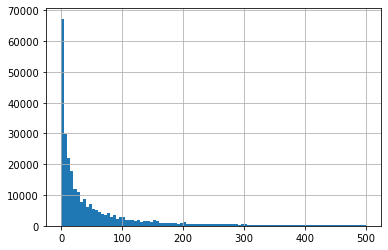

In [29]:
data["Amount"].loc[data["Amount"] < 500].hist(bins=100)

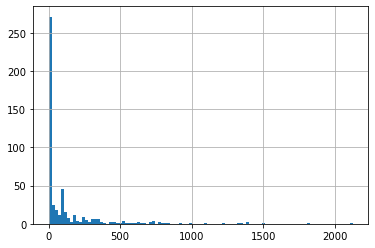

In [30]:
fraud_data["Amount"].hist(bins=100);

Comparing the amount feature for normal data and fraud data we can see that this feature is of no help as amount columns looks the same in both the data 

In [31]:
mean_median=[]
mean_median.append(["Mean",data["Amount"].mean(), fraud_data["Amount"].mean()])
mean_median.append(["Median",data["Amount"].median(), fraud_data["Amount"].median()])
mm_df = pd.DataFrame(mean_median, columns = ['Mean/Median', 'Normal data','Fraud data'])
mm_df

,Mean/Median,Normal data,Fraud data
0,Mean,88.291022,122.211321
1,Median,22.000000,9.250000


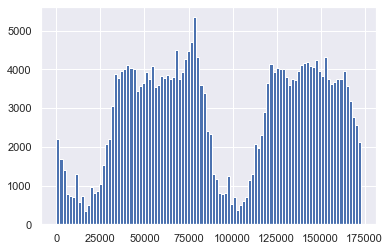

In [62]:
data["Time"].hist(bins=100);

<AxesSubplot:>

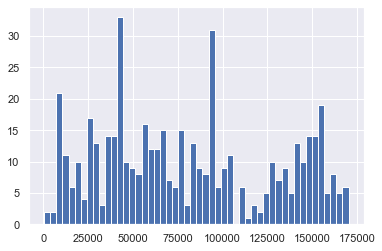

In [63]:
fraud_data["Time"].hist(bins=50)

Even when we compare the time feature for both normal and fradulaent data we can see that they look almost the same. We can conclude that its hard to detect anamolies by looking at the features.

# 3 unsupervised approaches (anamoly detection) were considered

As mentioned earlier the data is highly imbalanced so we adopt to anamoly detection techniques and try to improve our f1 score because accuracy is a bad measure.

# Local Outlier Factor

In [13]:
num_test = 20000
shuffled_data = X_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train_lof = shuffled_data

X_test_lof = np.concatenate([shuffled_data[-num_test:], X_fraud_data[:]])
y_test_lof = np.concatenate([np.zeros(num_test), np.ones(492)])

In [14]:
X_inliers = shuffled_data[-num_test:]
X_outliers = X_fraud_data[:]
X_lof = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)

print("Fraud percentage ",n_outliers / X_test_lof.shape[0])

Fraud percentage  0.024009369510052704


In [15]:
lof = LocalOutlierFactor(n_neighbors=20, contamination = n_outliers / X_test_lof.shape[0])
y_pred_lof = lof.fit_predict(X_lof)

In [16]:
y_pred_lof_DF = pd.DataFrame(y_pred_lof)
y_pred_lof_DF[y_pred_lof_DF[0] == 1] = 0
y_pred_lof_DF[y_pred_lof_DF[0] == -1] = 1
y_pred_lof1 = y_pred_lof_DF.values
y_pred_lof1 = np.ravel(y_pred_lof1)

In [17]:
print("Accuracy : ",accuracy_score(y_test_lof,y_pred_lof1))

Accuracy :  0.9544212375561194


In [18]:
print(classification_report(y_test_lof,y_pred_lof1))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     20000
         1.0       0.05      0.05      0.05       492

    accuracy                           0.95     20492
   macro avg       0.51      0.51      0.51     20492
weighted avg       0.95      0.95      0.95     20492



Text(0.5, 1.0, 'Confusion Matrix')

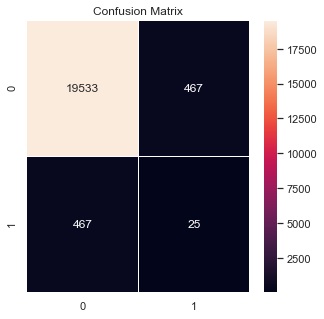

In [19]:
plt.figure(figsize=(5,5))
sns.set()
sns.heatmap(confusion_matrix(y_test_lof,y_pred_lof1), annot=True, fmt="d", linewidths=.5)
plt.title("Confusion Matrix")

First unsupervised approach we considered was Local outlier factor. From the confusion matrix we can see that only 25 data points were correctly classified as fradulent and the rest were misclassified.even the f-score is very poor which is 0.05.

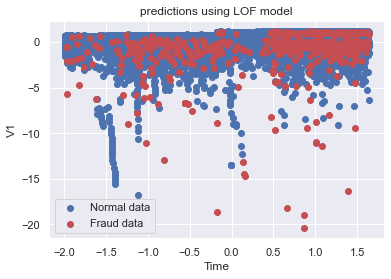

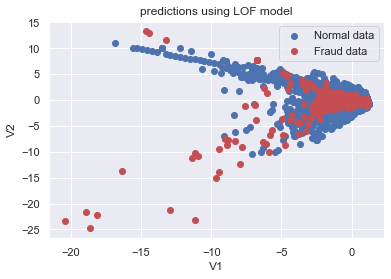

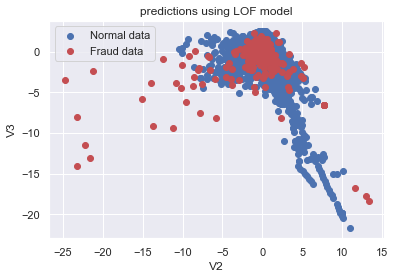

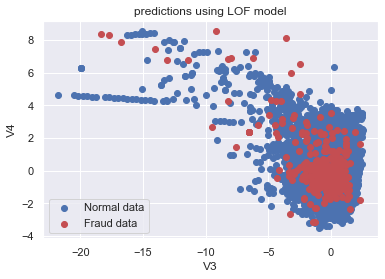

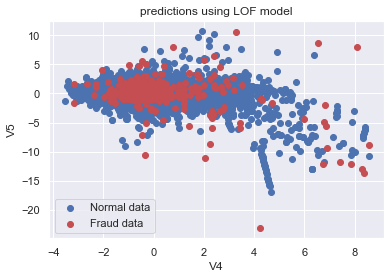

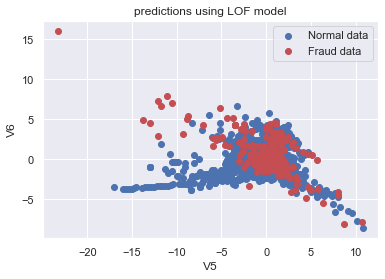

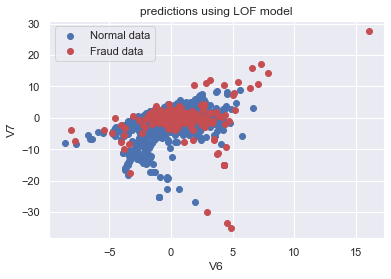

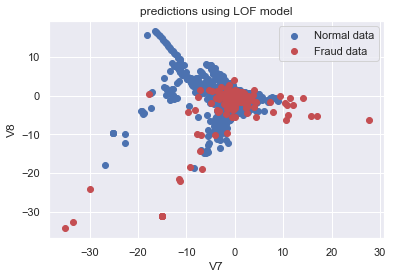

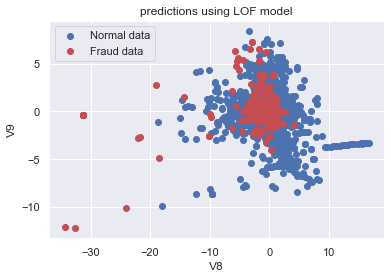

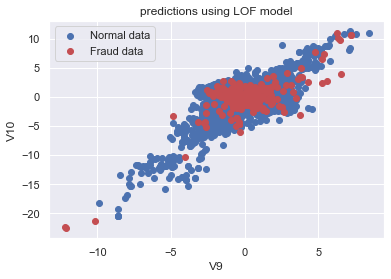

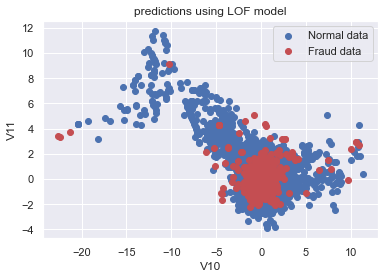

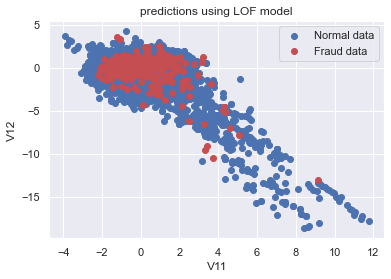

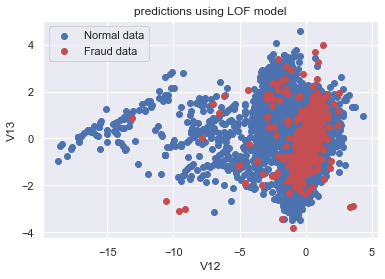

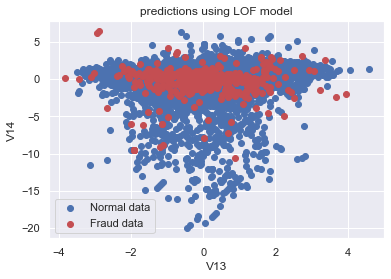

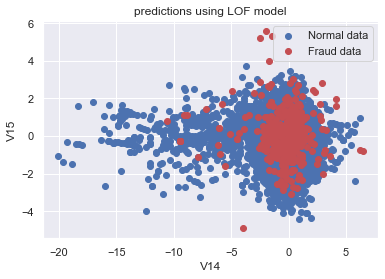

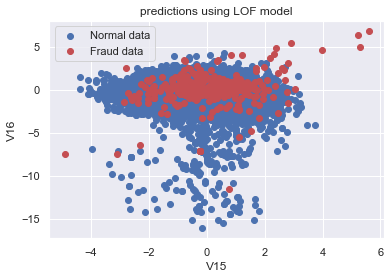

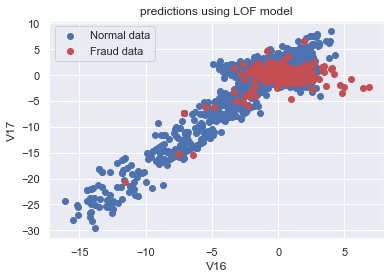

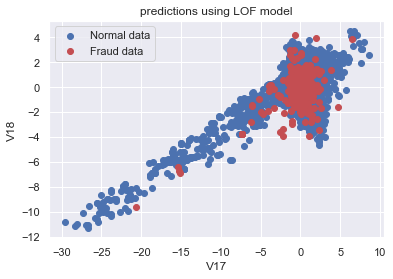

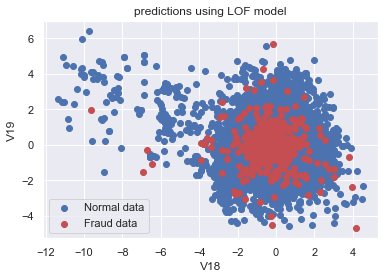

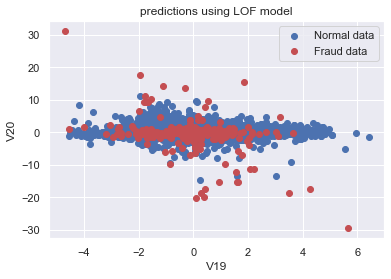

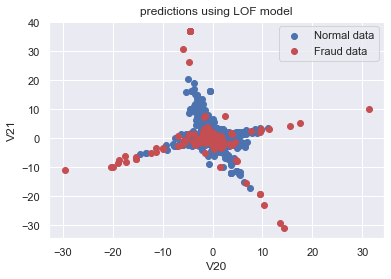

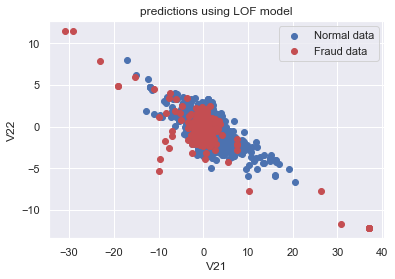

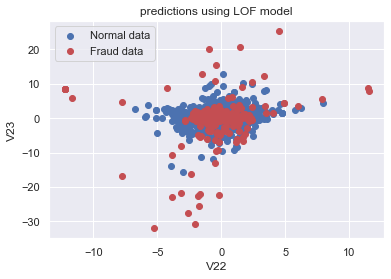

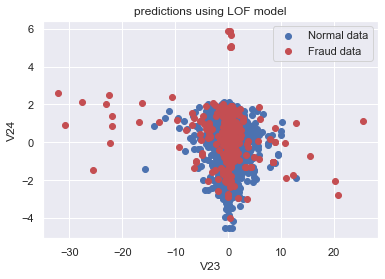

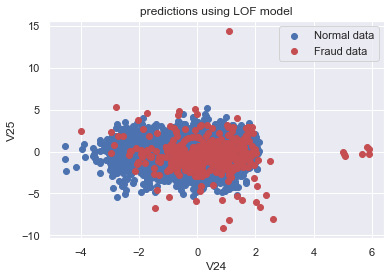

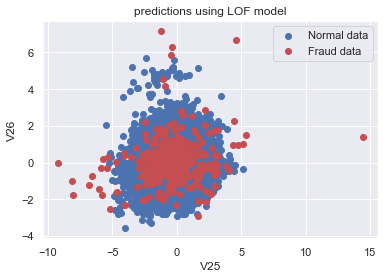

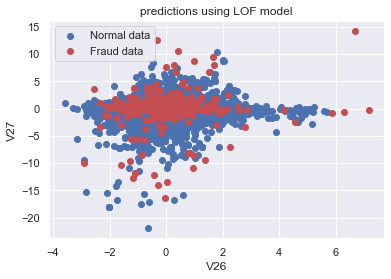

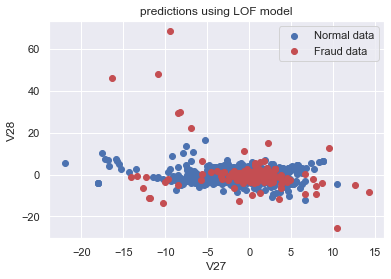

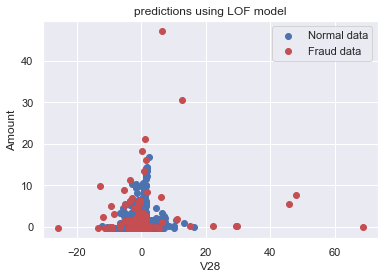

In [40]:
columns=X_data.columns
for i in range(29):
    plt.scatter(X_lof[y_pred_lof1 == 0, i], X_lof[y_pred_lof1 == 0, i+1], label="Normal data")
    plt.scatter(X_lof[y_pred_lof1 == 1, i], X_lof[y_pred_lof1 == 1, i+1], label="Fraud data", c='r')
    plt.title("predictions using LOF model")
    plt.xlabel(columns[i])
    plt.ylabel(columns[i+1])
    plt.legend()
    plt.show()

# Isolation Forest

In [41]:
num_test_if = 75000
shuffled_data = X_data.sample(frac=1, random_state=1960)[:-num_test_if].values
X_train_if = shuffled_data

X_test_if = np.concatenate([shuffled_data[-num_test_if:], X_fraud_data[:]])
y_test_if = np.concatenate([np.zeros(num_test_if), np.ones(492)])


In [42]:
X_inliers_if = shuffled_data[-num_test_if:]
X_outliers_if = X_fraud_data[:]
X_if = np.r_[X_inliers_if, X_outliers_if]

n_outliers_if = len(X_outliers_if)

print("Fraud percentage ",n_outliers_if / X_test_if.shape[0])

Fraud percentage  0.0065172468605945


Hyperparameter tuning in Isolation forest

In [43]:
minNN = 900
maxNN = 1150
    
opt_F1 = []

for TryNN in range(minNN,maxNN,50):
    isoNN = IsolationForest(n_estimators = TryNN, max_features = 1.0, max_samples=1.0, 
                        behaviour="new", bootstrap=False, random_state=22,
                        contamination = n_outliers_if / X_test_if.shape[0])
    y_pred_iso = isoNN.fit_predict(X_if)
    
    y_pred_iso_DF = pd.DataFrame(y_pred_iso)
    
    y_pred_iso_DF[y_pred_iso_DF[0] == 1] = 0
    y_pred_iso_DF[y_pred_iso_DF[0] == -1] = 1
    
    y_pred_iso1 = y_pred_iso_DF.values
    y_pred_iso1 = np.ravel(y_pred_iso1)
    
    f1  = f1_score(y_test_if, y_pred_iso1, average='binary')
    
    opt_F1.append([TryNN, round(f1,4)])
    

In [44]:
opt_F1df = pd.DataFrame(opt_F1, columns = ['NumEstimators', 'F1 score'])
opt_F1df.head()

,NumEstimators,F1 score
0,900,0.4593
1,950,0.4573
2,1000,0.4573
3,1050,0.4614
4,1100,0.4614


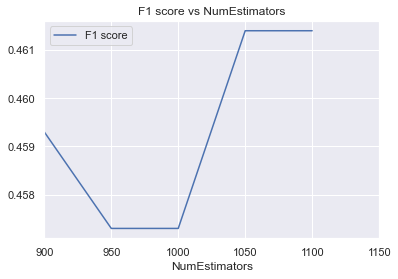

In [45]:
opt_F1df.plot.line("NumEstimators","F1 score")
plt.xlim(minNN, maxNN)
plt.title("F1 score vs NumEstimators")
plt.show()

After testing the model against different number of estimators we can see that the f1 score did not improve after 1050 number of estimators.

In [43]:
isofo = IsolationForest(n_estimators = 1050, max_features = 1.0, max_samples=1.0, 
                        behaviour="new", bootstrap=False, random_state=22,
                        contamination = n_outliers_if / X_test_if.shape[0])

y_pred_iso = isofo.fit_predict(X_if)

In [44]:
y_pred_iso_DF = pd.DataFrame(y_pred_iso)
y_pred_iso_DF[y_pred_iso_DF[0] == 1] = 0
y_pred_iso_DF[y_pred_iso_DF[0] == -1] = 1
y_pred_iso1 = y_pred_iso_DF.values
y_pred_iso1 = np.ravel(y_pred_iso1)

In [45]:
print("Accuracy : ",accuracy_score(y_test_if,y_pred_iso1))

Accuracy :  0.9929793885444815


In [46]:
print(classification_report(y_test_if,y_pred_iso1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     75000
         1.0       0.46      0.46      0.46       492

    accuracy                           0.99     75492
   macro avg       0.73      0.73      0.73     75492
weighted avg       0.99      0.99      0.99     75492



Text(0.5, 1.0, 'Confusion Matrix')

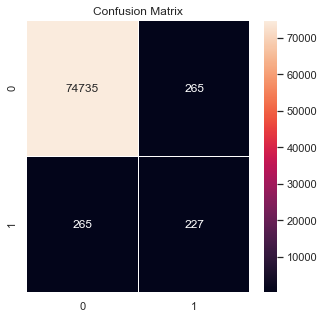

In [47]:
plt.figure(figsize=(5,5))
sns.set()
sns.heatmap(confusion_matrix(y_test_if,y_pred_iso1), annot=True, fmt="d", linewidths=.5)
plt.title("Confusion Matrix")

Isolation forest has comparitively performed well as the f1 score has increased to 0.46. From the confusion matrix we can see that 227 data points are correctly classified as fraud.

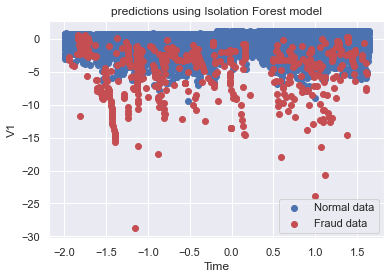

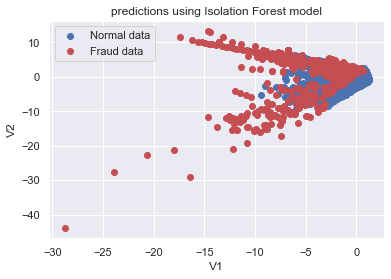

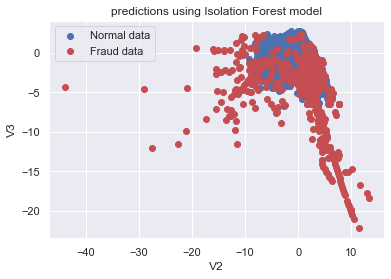

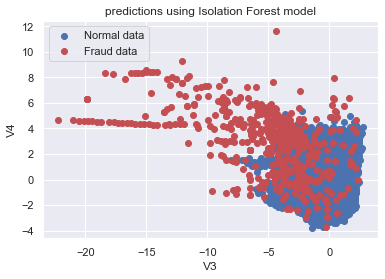

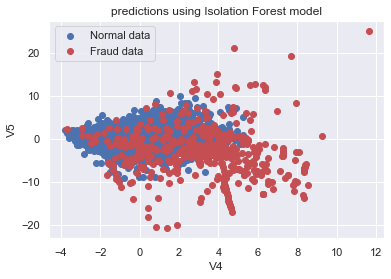

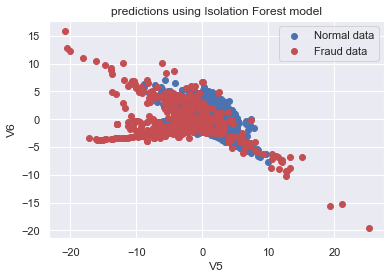

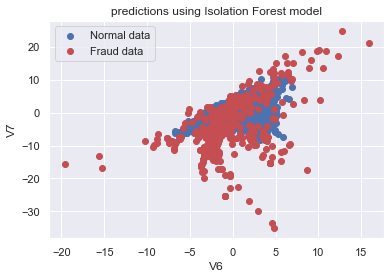

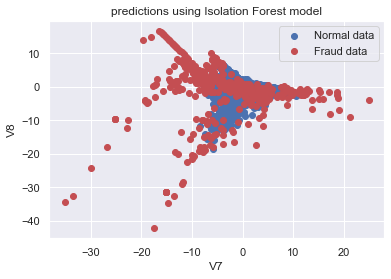

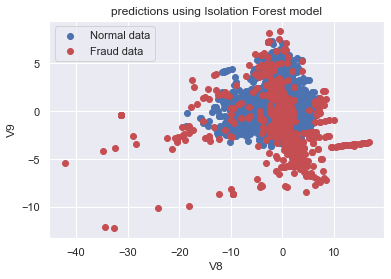

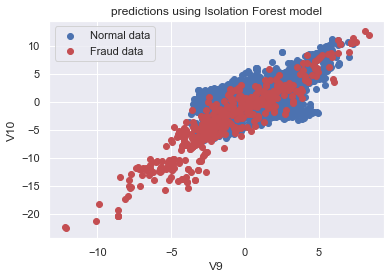

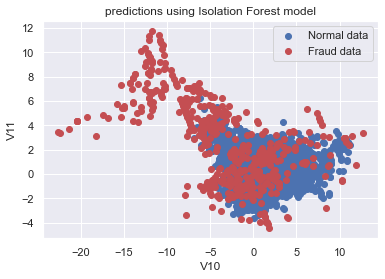

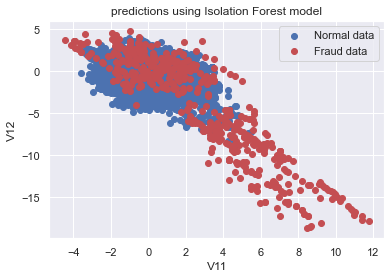

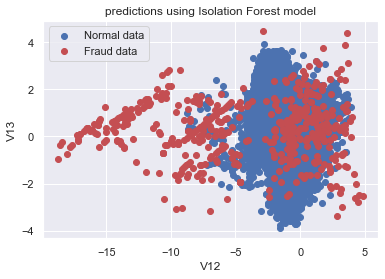

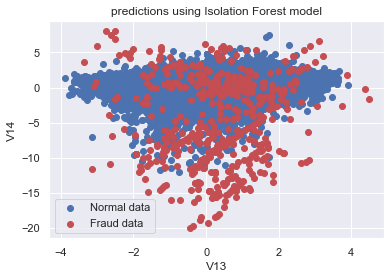

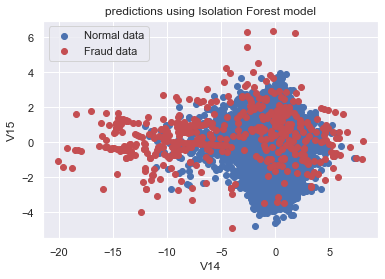

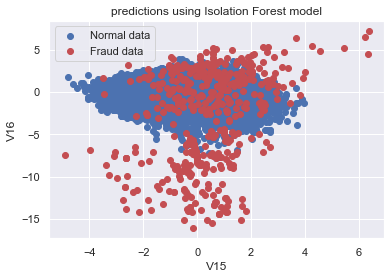

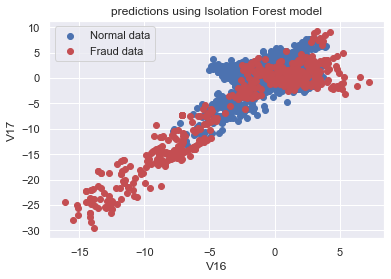

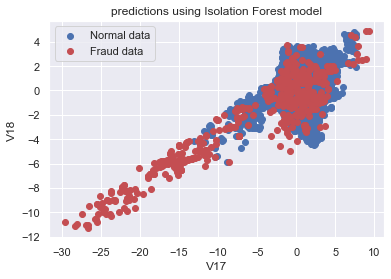

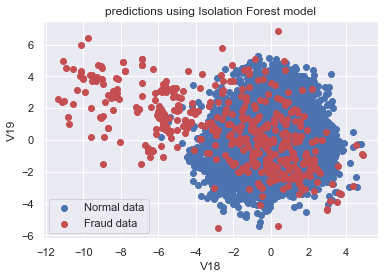

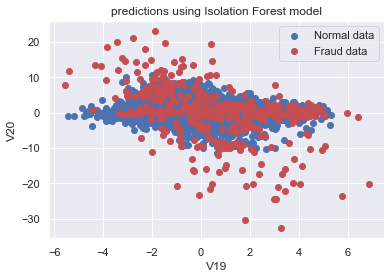

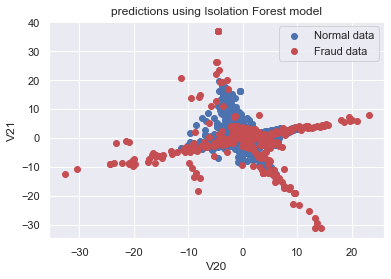

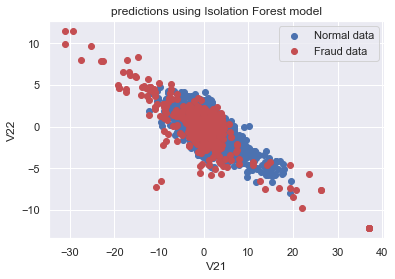

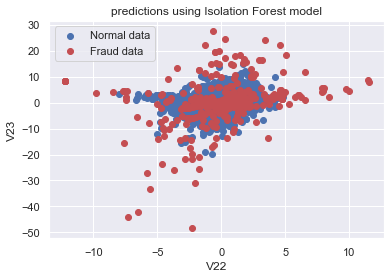

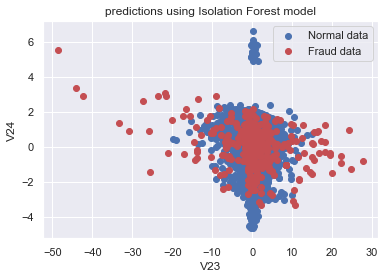

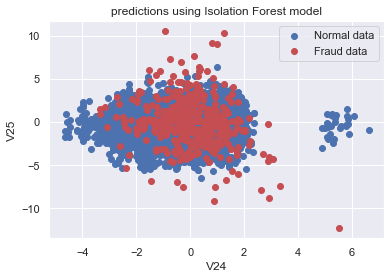

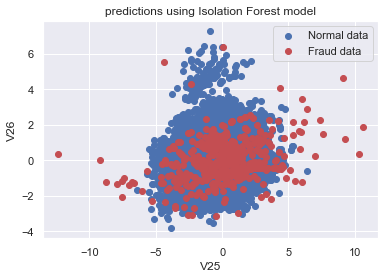

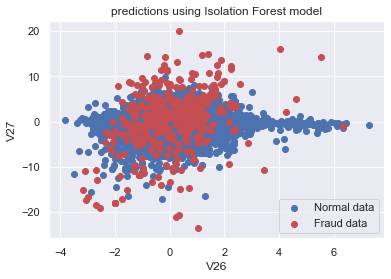

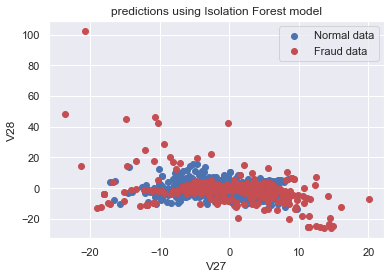

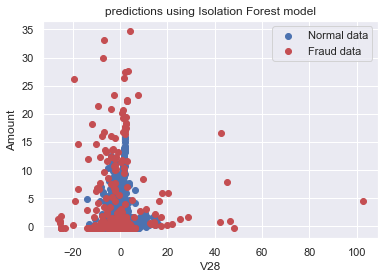

In [48]:
columns=X_data.columns
for i in range(29):
    plt.scatter(X_if[y_pred_iso1 == 0, i], X_if[y_pred_iso1 == 0, i+1], label="Normal data")
    plt.scatter(X_if[y_pred_iso1 == 1, i], X_if[y_pred_iso1 == 1, i+1], label="Fraud data", c='r')
    plt.title("predictions using Isolation Forest model")
    plt.xlabel(columns[i])
    plt.ylabel(columns[i+1])
    plt.legend()
    plt.show()

# One class SVM

In [50]:
num_test_svm = 75000
shuffled_data = X_data.sample(frac=1, random_state=1960)[:-num_test_svm].values
X_train_svm = shuffled_data

X_test_svm = np.concatenate([shuffled_data[-num_test_svm:], X_fraud_data[:]])
y_test_svm = np.concatenate([np.zeros(num_test_svm), np.ones(492)])


In [51]:
X_inliers_svm = shuffled_data[-num_test_svm:]
X_outliers_svm = X_fraud_data[:]
X_svm = np.r_[X_inliers_svm, X_outliers_svm]

n_outliers_svm = len(X_outliers_svm)
print("Fraud percentage ",n_outliers_svm / X_test_svm.shape[0])

Fraud percentage  0.0065172468605945


Hyperparameter tuning in One Class SVM

In [54]:
minRE = 0.017
maxRE = 0.022
    
op_F1_svm = []

for TryRE in np.arange(minRE, maxRE, 0.001):
    OneSVM = OneClassSVM(nu = TryRE)
    y_pred_svm = OneSVM.fit_predict(X_svm)
    
    y_pred_svm_DF = pd.DataFrame(y_pred_svm)
    
    y_pred_svm_DF[y_pred_svm_DF[0] == 1] = 0
    y_pred_svm_DF[y_pred_svm_DF[0] == -1] = 1
    
    y_pred_svm1 = y_pred_svm_DF.values
    y_pred_svm1 = np.ravel(y_pred_svm1)
    
    f1  = f1_score(y_test_svm, y_pred_svm1, average='binary')

    op_F1_svm.append([TryRE, round(f1,4)])


In [55]:
op_F1_svmdf = pd.DataFrame(op_F1_svm, columns = ['nu', 'F1 score'])
op_F1_svmdf.head()

,nu,F1 score
0,0.017,0.2567
1,0.018,0.2695
2,0.019,0.2757
3,0.020,0.2830
4,0.021,0.2783


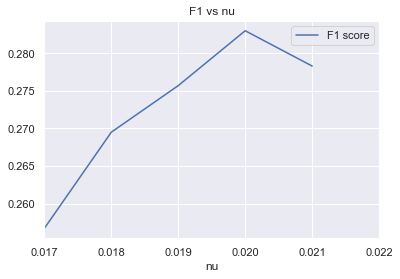

In [56]:
op_F1_svmdf.plot.line("nu","F1 score")
plt.xlim(minRE, maxRE)
plt.title("F1 vs nu")
plt.show()

After performing hyperparameter tuning for one class SVM we can see that 0.020 is the best value for nu. 

In [52]:
OneSVM = OneClassSVM(nu = 0.020)

y_pred_svm = OneSVM.fit_predict(X_svm)

In [53]:
y_pred_svm_DF = pd.DataFrame(y_pred_svm)
y_pred_svm_DF[y_pred_svm_DF[0] == 1] = 0
y_pred_svm_DF[y_pred_svm_DF[0] == -1] = 1
y_pred_svm1 = y_pred_svm_DF.values
y_pred_svm1 = np.ravel(y_pred_svm1)

In [54]:
print("Accuracy : ",accuracy_score(y_test_svm,y_pred_svm1))

Accuracy :  0.9808059132093467


In [55]:
print(classification_report(y_test_svm,y_pred_svm1))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     75000
         1.0       0.19      0.58      0.28       492

    accuracy                           0.98     75492
   macro avg       0.59      0.78      0.64     75492
weighted avg       0.99      0.98      0.99     75492



Text(0.5, 1.0, 'Confusion Matrix')

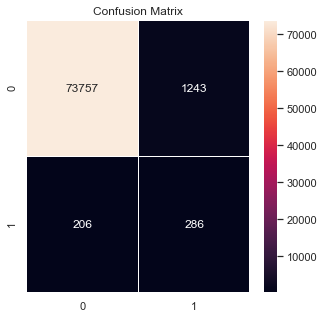

In [56]:
plt.figure(figsize=(5,5))
sns.set()
sns.heatmap(confusion_matrix(y_test_svm,y_pred_svm1), annot=True, fmt="d", linewidths=.5)
plt.title("Confusion Matrix")

We can see that one class SVM has classified 286 datapoints correctly as fraud but at the same time 1243 normal datapoints are misclassified as fraud. This shows that this is not a good model even the f1 score is low which is 0.28.We can aslo see in the graphs below how many points are classified while most of them are not.

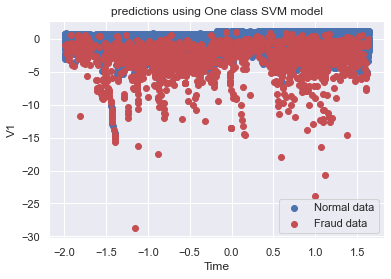

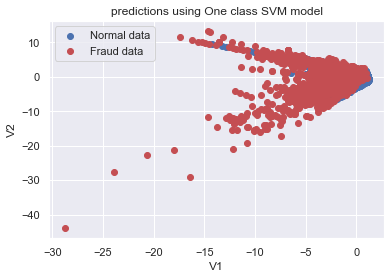

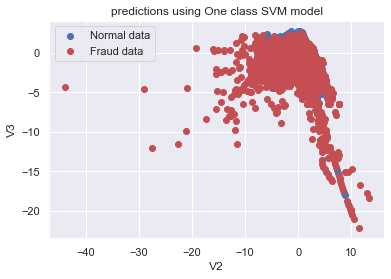

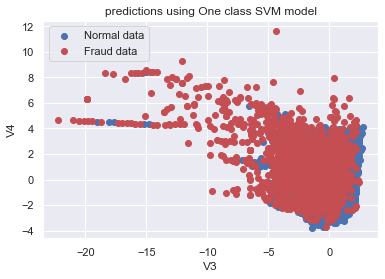

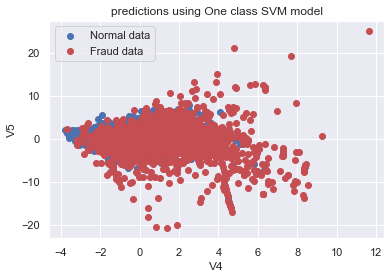

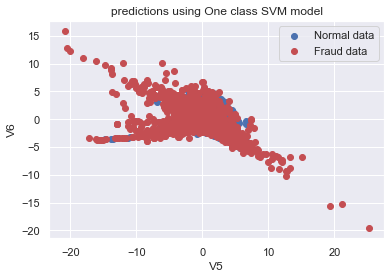

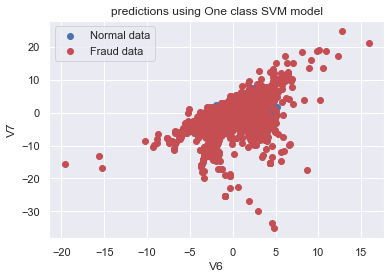

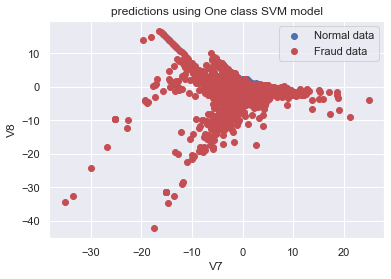

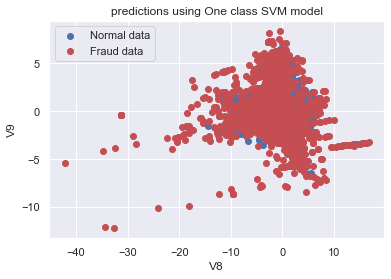

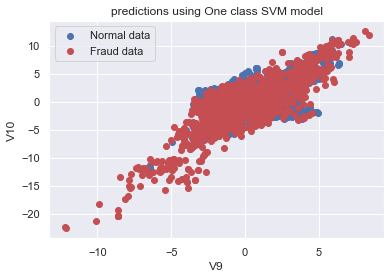

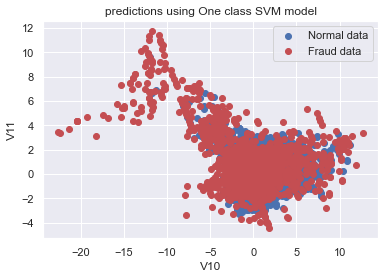

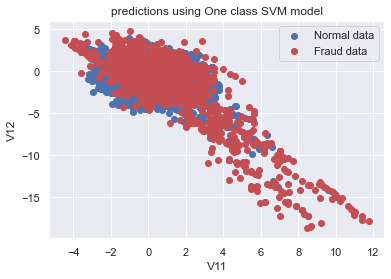

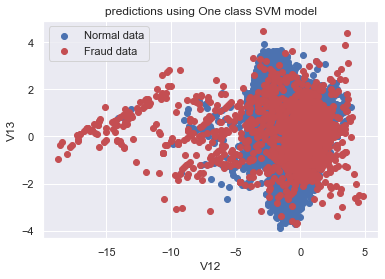

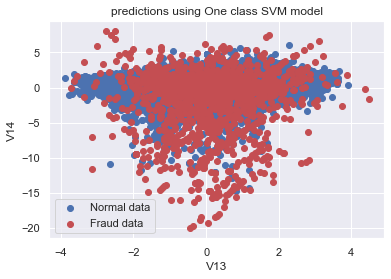

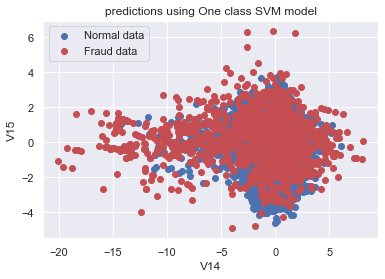

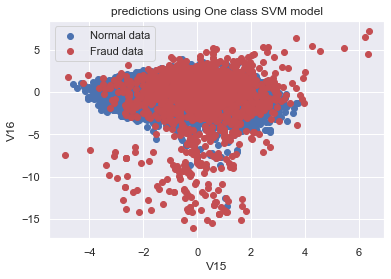

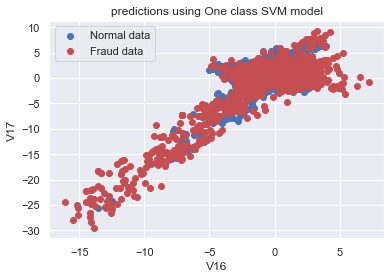

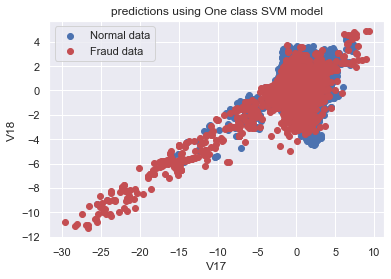

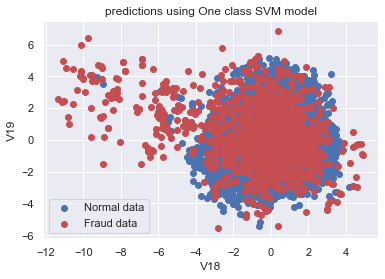

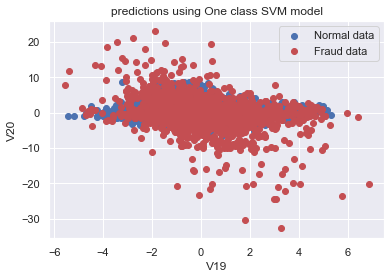

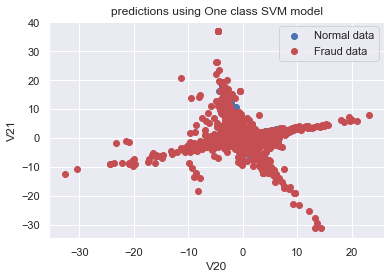

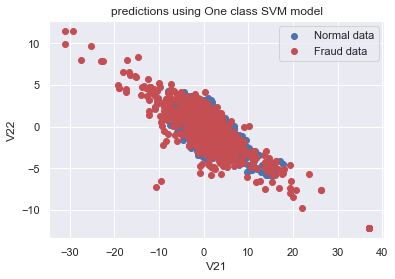

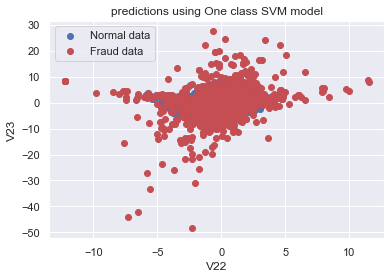

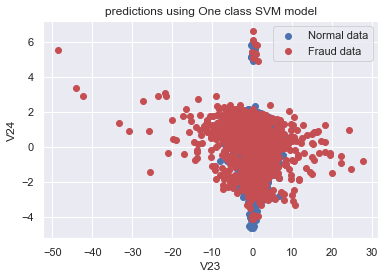

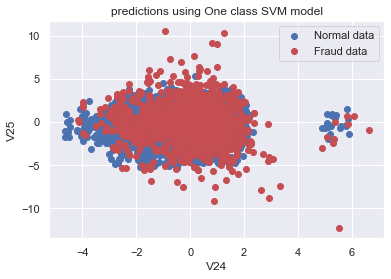

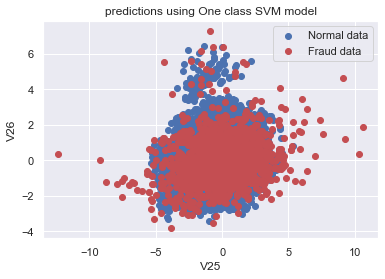

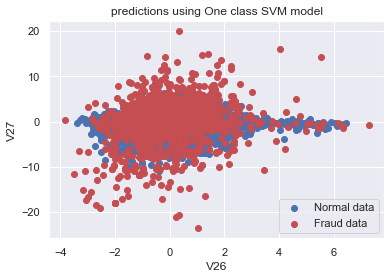

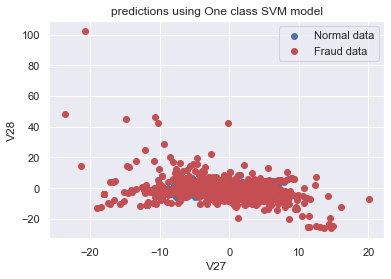

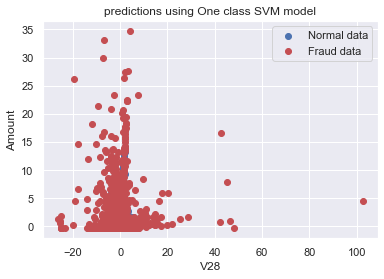

In [57]:
columns=X_data.columns
for i in range(29):
    plt.scatter(X_svm[y_pred_svm1 == 0, i], X_svm[y_pred_svm1 == 0, i+1], label="Normal data")
    plt.scatter(X_svm[y_pred_svm1 == 1, i], X_if[y_pred_svm1 == 1, i+1], label="Fraud data", c='r')
    plt.title("predictions using One class SVM model")
    plt.xlabel(columns[i])
    plt.ylabel(columns[i+1])
    plt.legend()
    plt.show()

# Conclusion
To conclude, among the three models we cosidered that is Local outlier factor, isolation forests and one class SVM we can say that isolation forests performed well with higher f1 score of 0.46.